In [8]:
!pip install amazon-braket-sdk

  Using cached antlr4_python3_runtime-4.9.2-py3-none-any.whl
  Using cached mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.8/537.8 kB 758.3 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.8/539.8 kB 963.6 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 985.4 kB/s eta 0:00:00:0100:01m
Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
  Attempting uninstall: openqasm3
    Found existing installation: openqasm3 0.5.0
    Uninstalling openqasm3-0.5.0:
      Successfully uninstalled openqasm3-0.5.0
  Attempting uninstall: antlr4-python3-runtime
    Found existing installation: antlr4-python3-runtime 4.13.2
    Uninstalling antlr4-python3-runtime-4.13.2:
      Successfully uninstalled antlr4-python3-runtime-4.13.2
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.36
    Uninstalling botocore-1.35.36:
      Successfully uninstalled botocore-1.

In [9]:
# Imports and Setup
import matplotlib.pyplot as plt
import numpy as np

from braket.circuits import Circuit
from braket.devices import LocalSimulator

%matplotlib inline

# Sets the device to run the circuit on
device = LocalSimulator()

In [13]:
# Import local utils
from simon_utils import simons_oracle  # noqa: F401

In [14]:
s = "101011"

# Other examples to try:
# s = '011'
# s = '00000'
# s = '1'
# Generate a random string of random length from 1 to 10:
# s="".join(str(np.random.randint(2)) for _ in range(np.random.randint(1,10)))

print("The secret string is: " + s)

The secret string is: 101011


In [15]:
n = len(s)

circ = Circuit()

# Apply Hadamard gates to first n qubits
circ.h(range(n))

# Now apply the Oracle for f
circ.simons_oracle(s)

# Apply Hadamard gates to the first n qubits
circ.h(range(n))


print(circ)

T   : │  0  │                 1                 │     2     │  3  │  4  │  5  │  6  │
       ┌───┐                                                                   ┌───┐ 
q0  : ─┤ H ├───●───────────────────────────────────●───────────●─────●─────●───┤ H ├─
       └───┘   │                                   │           │     │     │   └───┘ 
       ┌───┐   │                                   │   ┌───┐   │     │     │         
q1  : ─┤ H ├───┼─────●─────────────────────────────┼───┤ H ├───┼─────┼─────┼─────────
       └───┘   │     │                             │   └───┘   │     │     │         
       ┌───┐   │     │                             │   ┌───┐   │     │     │         
q2  : ─┤ H ├───┼─────┼─────●───────────────────────┼───┤ H ├───┼─────┼─────┼─────────
       └───┘   │     │     │                       │   └───┘   │     │     │         
       ┌───┐   │     │     │                       │   ┌───┐   │     │     │         
q3  : ─┤ H ├───┼─────┼─────┼─────●─────────────────┼──

In [16]:
task = device.run(circ, shots=4 * n)

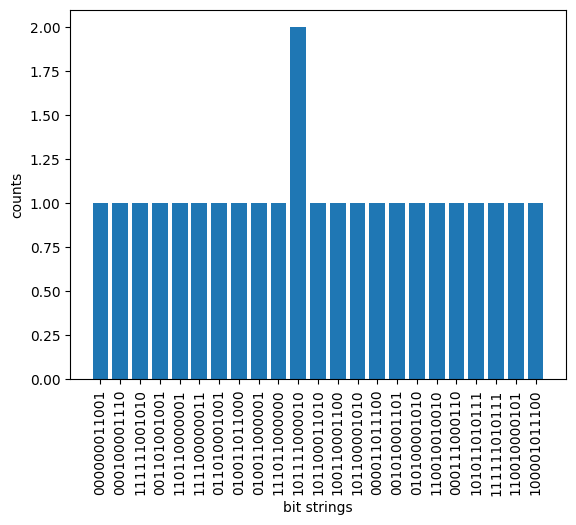

In [17]:
result = task.result()

counts = result.measurement_counts
plt.bar(counts.keys(), counts.values())
plt.xlabel("bit strings")
plt.ylabel("counts")
plt.xticks(rotation=90)
plt.show()

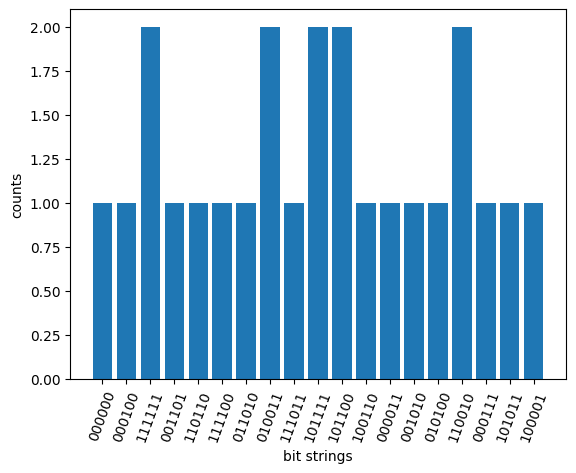

In [18]:
new_results = {}
for bitstring, count in result.measurement_counts.items():
    # Only keep the outcomes on first n qubits
    trunc_bitstring = bitstring[:n]
    # Add the count to that of the of truncated bit string
    new_results[trunc_bitstring] = new_results.get(trunc_bitstring, 0) + count

plt.bar(new_results.keys(), new_results.values())
plt.xlabel("bit strings")
plt.ylabel("counts")
plt.xticks(rotation=70)
plt.show()